# Lesson 08 - Solutions
These exercises are to help you check your understanding during class. They will not be collected.

## Part 1: Titles

### Exercise 1 - Set up and review

- Exicute the code in the code block below. This will make all you plots 5 in by 4 in
- Load both the ```dplyr``` and the ```ggplot2``` packages.
- Import the data in the NYC_Tree_Census_small.csv file in the ~/shared/data folder. This data set contains information about the trees in New York City in 2015. The documentation for this data is provided by on the NYC Open Data project on the following webpage: <br>
https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh

In [6]:
# Resizes all plots to 5 in by 4 in
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

In [2]:
# load the dplyr and ggplot2 packages
# The warn.conflicts=FALSE option supressess the warnings
library(dplyr, warn.conflicts=FALSE)
library(ggplot2, warn.conflicts=FALSE)

# load data
trees <- read.csv('../shared/data/NYC_Tree_Census_small.csv')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### Exercise 2 - Where are the trees?
Create a scatter plot that shows the location of all of the trees in the data set

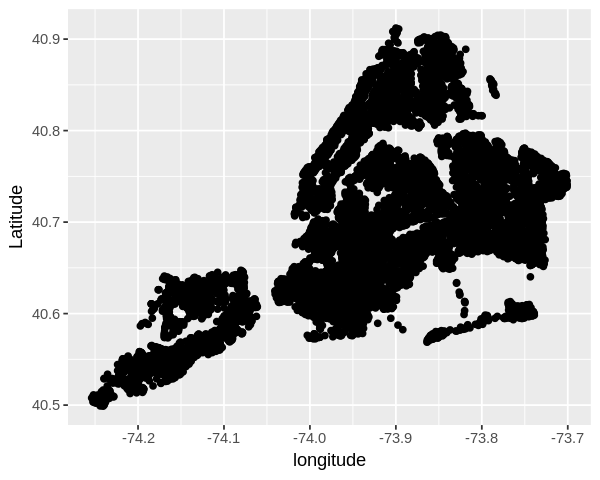

In [7]:
ggplot(trees, aes(x=longitude, y=Latitude)) + geom_point()

### Exercise 3 - Air quality 
  - Review the properties of the built in data set called `airquality` by looking at its documentation.
  - Create a scatter plot that shows the relationship between temperature and the amount of ozone in the air. 
  - Create a scatter plot that shows the relationship between temperature and wind speed.

In [4]:
?airquality

Warning message:
“Removed 37 rows containing missing values (geom_point).”

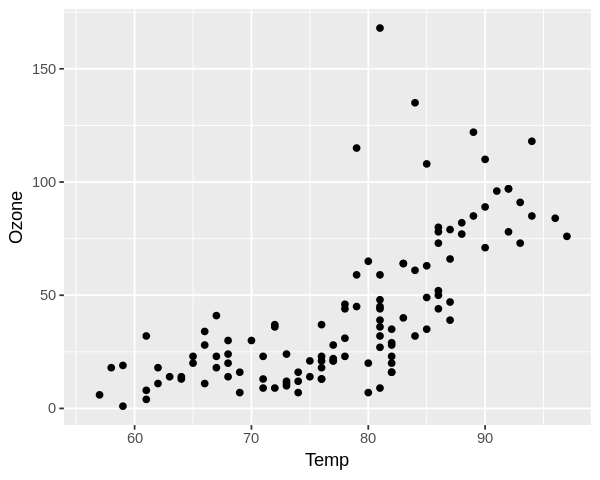

In [8]:
ggplot(airquality, aes(x=Temp, y=Ozone)) + geom_point()

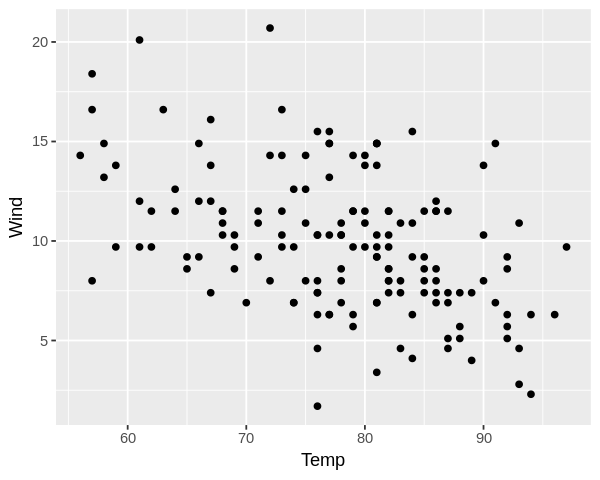

In [9]:
ggplot(airquality, aes(x=Temp, y=Wind)) + geom_point()

## Part 2 - Color and layers

### Exercise 4 - Color code the trees
Add the folowing features to your plot from Exercies 2.
- Color the stumpts black, the living trees light grey and the dead trees red.
- Make the background white.

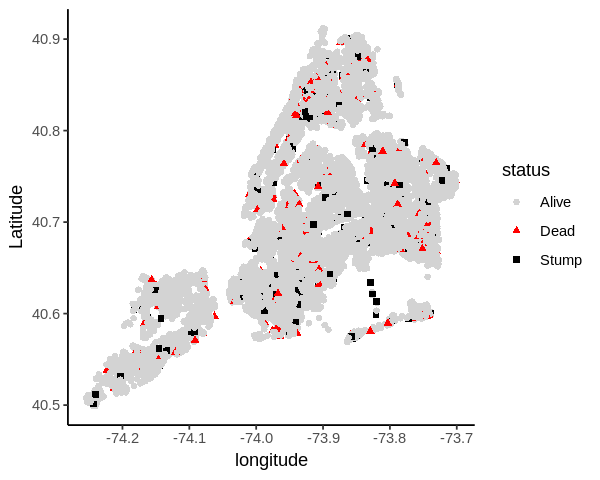

In [14]:
ggplot(trees, aes(x=longitude, y=Latitude, color=status, shape=status)) + 
    geom_point() +
    scale_color_manual(values=c("lightgrey", "red", "black")) +
    theme_classic()

### Exercise 5 - Large triangles
Add the following features to your first plot from Exercise 3.
- Make the points triangles.
- Make the points large enough that you can easily see that they are triangles.

Warning message:
“Removed 37 rows containing missing values (geom_point).”


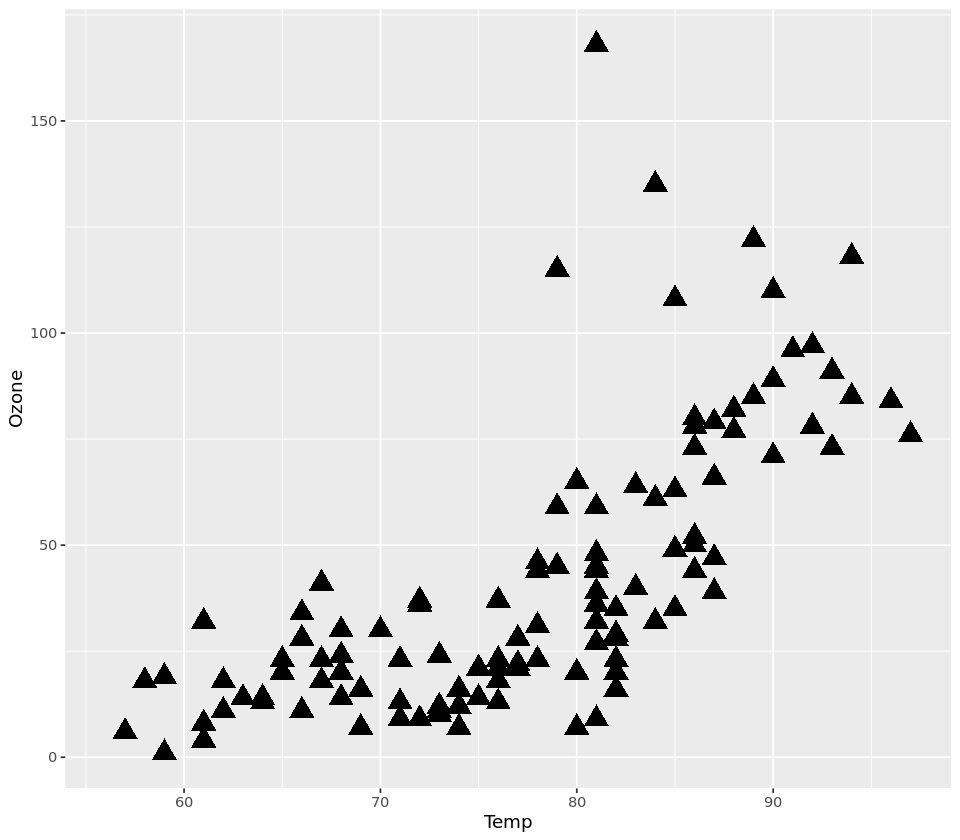

In [95]:
ggplot(airquality, aes(x=Temp, y=Ozone)) + 
    geom_point(shape = 17, size = 5)

## Part 3 - Layering

### Exercise 6 - Big trees
Create a data frame that contains just the 15 living treas with the largest diameter. 

**Hint:** You can use colon notation to select a part of a vector or particular rows for a data frame. 
```faithful$waiting[3:7]``` is the 3rd through the 5th entry in the waiting column of the faithful data frame. 
```faithful[5:12,]```  is row 5 through 12 of the faithful data frame. 

In [19]:
big_trees <- filter(trees, status == "Alive")
big_trees <- arrange(big_trees, desc(tree_dbh))
big_trees$tree_dbh[14:16]
big_trees <- filter(big_trees, tree_dbh >=46)
nrow(big_trees)

[1] 46 46 45

[1] 15

In [16]:
# Strategy 2 arrange and take first 15 rows
big_trees <- filter(trees, status == "Alive")
big_trees <- arrange(big_trees, desc(tree_dbh))[1:15,]

In [21]:
# Strategy 2 arrange and take first 15 rows
big_trees <- filter(trees, status == "Alive")
big_trees <- arrange(big_trees, desc(tree_dbh))
big_trees <- head(big_trees, 15)

### Exercise 7 - Map the big trees
Alter your plot from Exercise 4 so that it shoes the 15 trees from Exercise 6 as has yello triangles with black boarders.

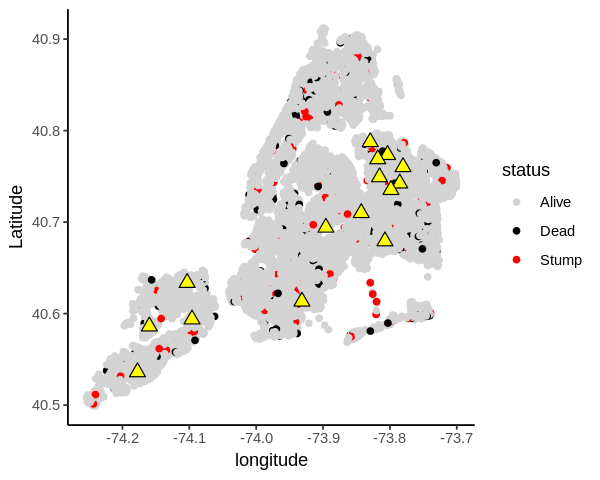

In [18]:
ggplot() + 
    geom_point(trees, mapping=aes(x=longitude, y=Latitude, color=status)) +
    scale_color_manual(values=c("lightgrey", "black", "red")) +
    geom_point(big_trees, mapping=aes(x=longitude, y=Latitude), shape = 24, color='black', fill='yellow', size = 3) +
    theme_classic()


## Examples from notes

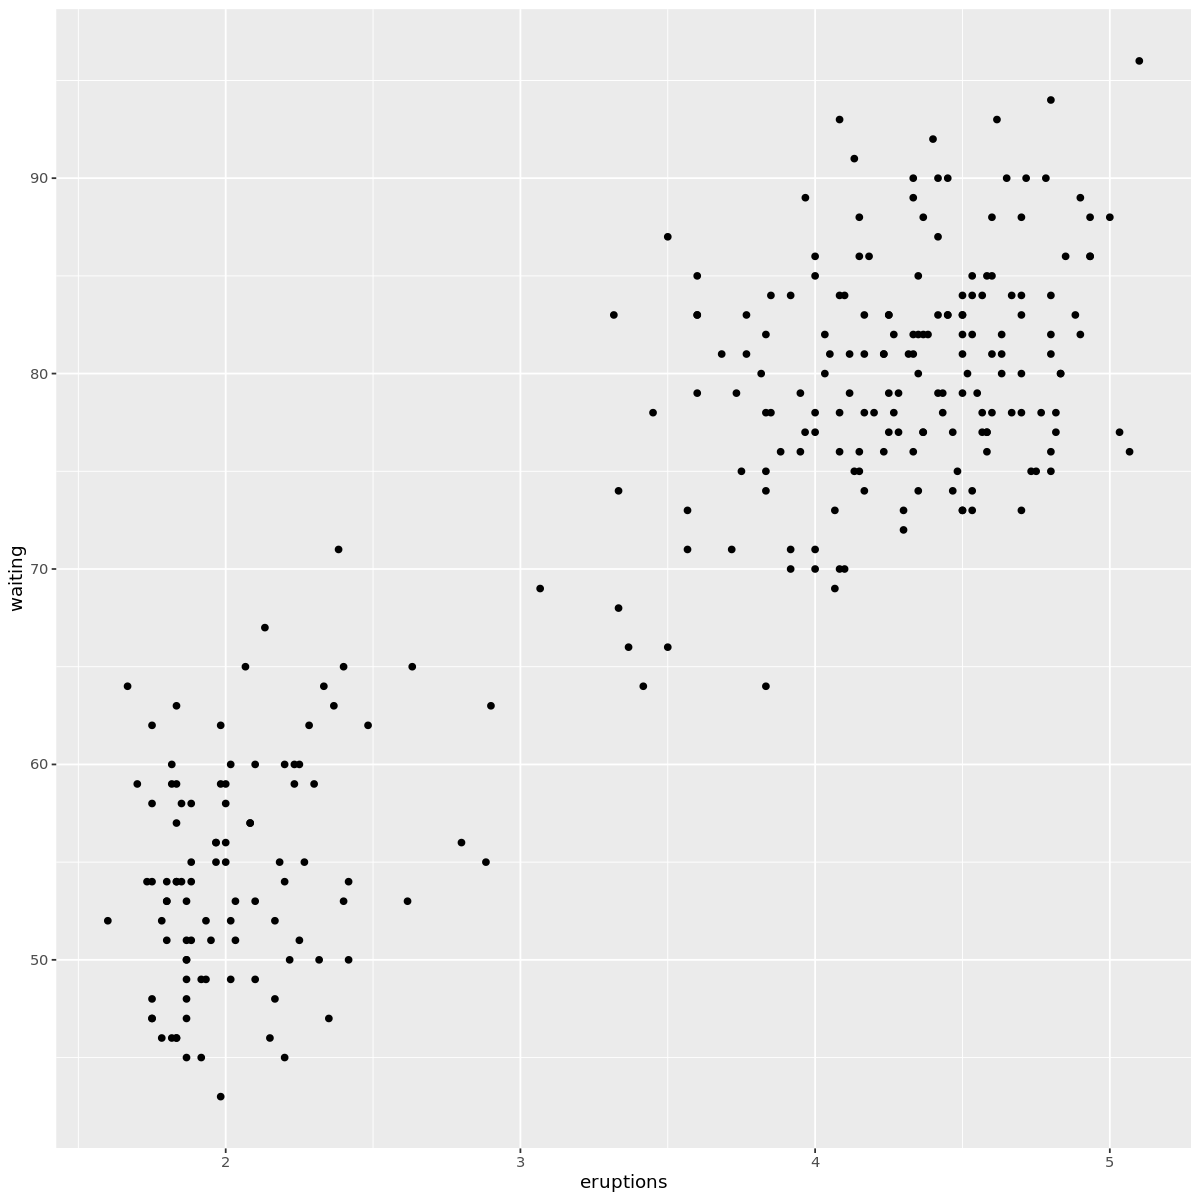

In [74]:
ggplot(faithful, aes(x=eruptions, y=waiting)) + geom_point()

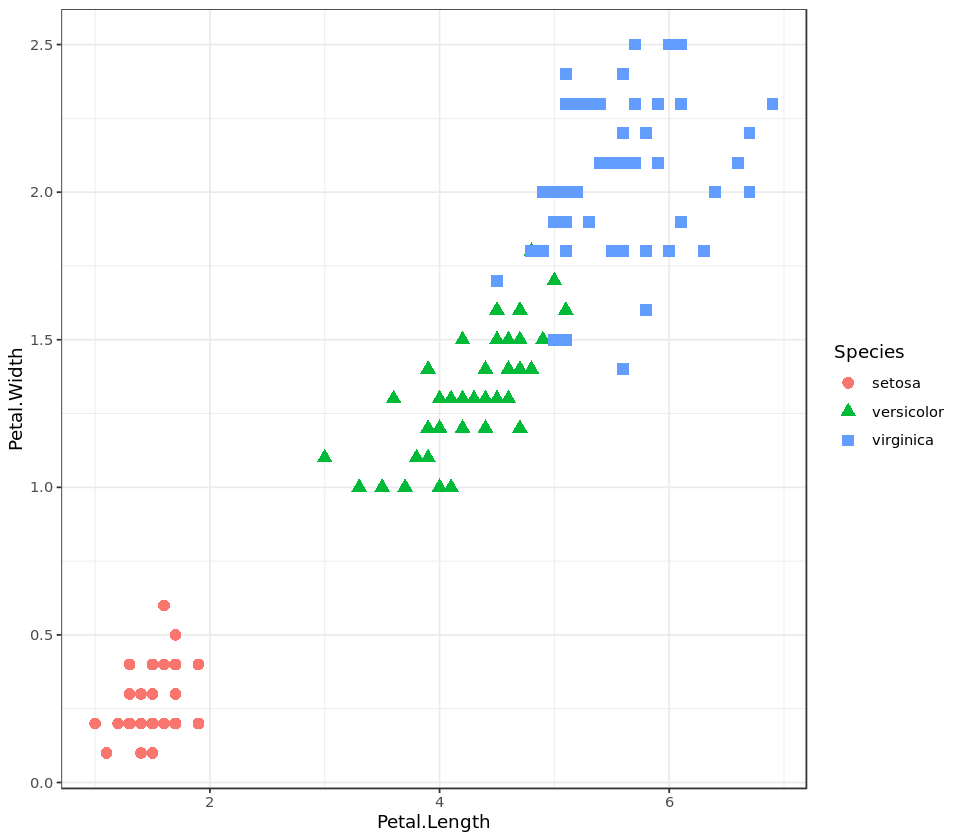

In [93]:
ggplot(iris, aes(x=Petal.Length, y=Petal.Width, color = Species, shape=Species)) +
    geom_point(size=3) +
    theme_bw()

In [115]:
airquality <- filter(airquality, !is.na(Ozone))
norm_airquality <- mutate(airquality, nOzone = Ozone / max(Ozone), nWind = Wind / max(Wind))

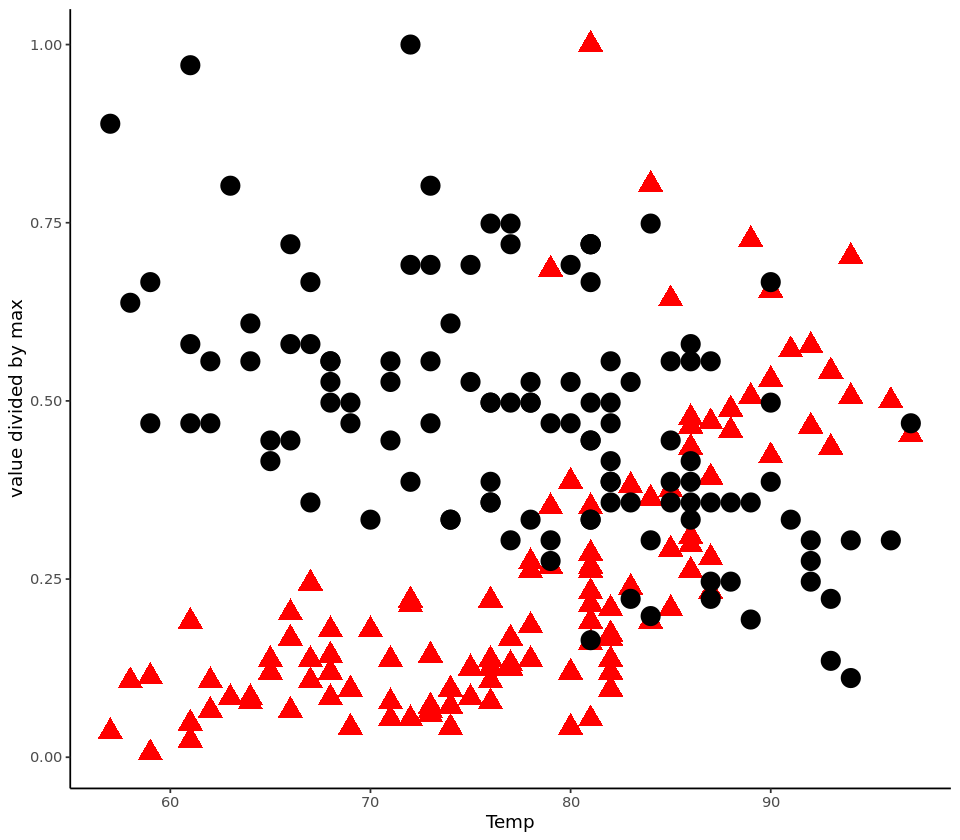

In [119]:
ggplot(norm_airquality) + 
    geom_point(mapping = aes(x=Temp, y=nOzone), shape = 17, color = 'red', size = 5) + 
    geom_point(mapping = aes(x=Temp, y=nWind), size = 5) +
    ylab('value divided by max')+
    theme_classic()